<a href="https://colab.research.google.com/github/r-prateek/Bird-Species-Classifier/blob/main/Birds-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d gpiosenka/100-bird-species
! unzip 100-bird-species.zip -d dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
train_path = "/content/dataset/train"
test_path = "/content/dataset/test"

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 5,
    #zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    #brightness_range = (3,8)
)

In [ ]:
train_data = datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 35215 images belonging to 250 classes.


In [ ]:
test_data = datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 1250 images belonging to 250 classes.


In [ ]:
inception = tf.keras.applications.InceptionResNetV2( 
    include_top = False,
    weights = 'imagenet',
    input_shape = (224, 224, 3)
)

In [ ]:
inception.trainable = False
inception.summary()

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(inception)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(250, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs = 25)

Epoch 1/25
1101/1101 [==============================] - 445s 370ms/step - loss: 3.6521 - accuracy: 0.2112 - val_loss: 1.6341 - val_accuracy: 0.5304
Epoch 2/25
1101/1101 [==============================] - 404s 367ms/step - loss: 1.9458 - accuracy: 0.4776 - val_loss: 1.2446 - val_accuracy: 0.6336
Epoch 3/25
1101/1101 [==============================] - 406s 368ms/step - loss: 1.6609 - accuracy: 0.5487 - val_loss: 1.1194 - val_accuracy: 0.6672
Epoch 4/25
1101/1101 [==============================] - 407s 370ms/step - loss: 1.5137 - accuracy: 0.5820 - val_loss: 1.0287 - val_accuracy: 0.7128
Epoch 5/25
1101/1101 [==============================] - 407s 369ms/step - loss: 1.4117 - accuracy: 0.6098 - val_loss: 0.9116 - val_accuracy: 0.7336
Epoch 6/25
1101/1101 [==============================] - 403s 366ms/step - loss: 1.3261 - accuracy: 0.6313 - val_loss: 0.8503 - val_accuracy: 0.7568
Epoch 7/25
1101/1101 [==============================] - 402s 365ms/step - loss: 1.2589 - accuracy: 0.6487 - val_

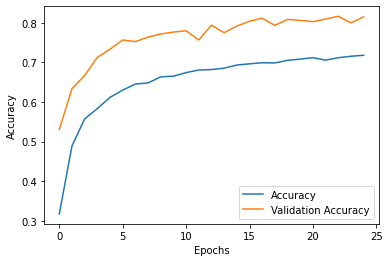

In [ ]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")

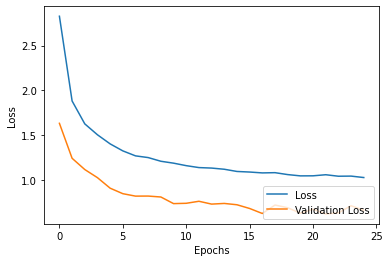

In [ ]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "lower right")

In [ ]:
model.save('birds1.h5')